## Codsoft Task 2 (Credit Card Fraud Detection)
### To develop a model that find fraud transactions and implement various machine learning techniques.

Step 1 : Import libararies 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step 2 : Extracting the data and Clean the uncessary data 

Dataset Link:
https://www.kaggle.com/datasets/kartik2112/fraud-detection (Contains two .csv files i.e., fraudTrain and fraudTest)

In [2]:
tra_data = pd.read_csv("C://Users//91990//OneDrive//Documents//fraudTrain.csv")

In [3]:
tes_data = pd.read_csv("C://Users//91990//OneDrive//Documents//fraudTest.csv")

In [4]:
tra_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [5]:
tes_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [6]:
#To caluclate the no of null values
tra_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
tes_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
tra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [9]:
tes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [10]:
#Now lets pop (clean) the unecessary data and combine both the data
pd.DataFrame(tra_data.isnull().value_counts())

,,,,,,,,,,,,,,,,,,,,,,,count
Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1296675


In [11]:
pd.DataFrame(tes_data.isnull().value_counts())

,,,,,,,,,,,,,,,,,,,,,,,count
Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,555719


In [12]:
tra_data.drop(columns=['Unnamed: 0','cc_num','merchant','first','last','trans_num','unix_time','street','trans_date_trans_time','zip','city'], inplace=True)

In [13]:
tes_data.drop(columns=['Unnamed: 0','first','last','street','zip','cc_num','trans_date_trans_time','merchant','trans_num','unix_time','city'], inplace=True)

In [14]:
tra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   category    1296675 non-null  object 
 1   amt         1296675 non-null  float64
 2   gender      1296675 non-null  object 
 3   state       1296675 non-null  object 
 4   lat         1296675 non-null  float64
 5   long        1296675 non-null  float64
 6   city_pop    1296675 non-null  int64  
 7   job         1296675 non-null  object 
 8   dob         1296675 non-null  object 
 9   merch_lat   1296675 non-null  float64
 10  merch_long  1296675 non-null  float64
 11  is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 118.7+ MB


In [15]:
tes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   category    555719 non-null  object 
 1   amt         555719 non-null  float64
 2   gender      555719 non-null  object 
 3   state       555719 non-null  object 
 4   lat         555719 non-null  float64
 5   long        555719 non-null  float64
 6   city_pop    555719 non-null  int64  
 7   job         555719 non-null  object 
 8   dob         555719 non-null  object 
 9   merch_lat   555719 non-null  float64
 10  merch_long  555719 non-null  float64
 11  is_fraud    555719 non-null  int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 50.9+ MB


In [16]:
final_data = pd.concat([tra_data, tes_data],  axis = 0)
final_data.head()

,category,amt,gender,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,misc_net,4.97,F,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,grocery_pos,107.23,F,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
2,entertainment,220.11,M,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0
3,gas_transport,45.00,M,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0
4,misc_pos,41.96,M,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0


<Axes: >

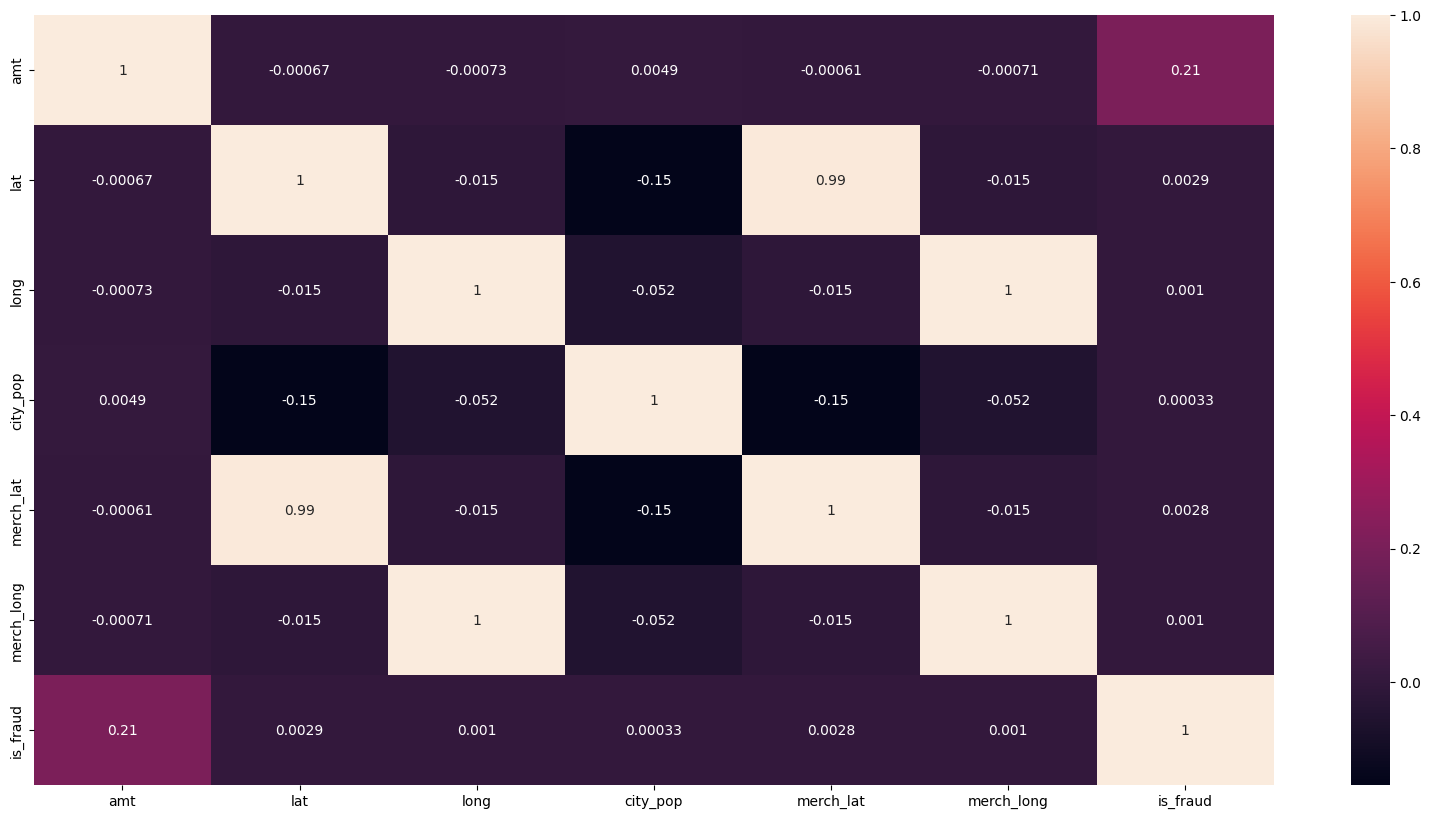

In [17]:
numeric_data = final_data.select_dtypes(include=['number'])
plt.figure(figsize=(20,10))
sns.heatmap(numeric_data.corr(), annot=True)

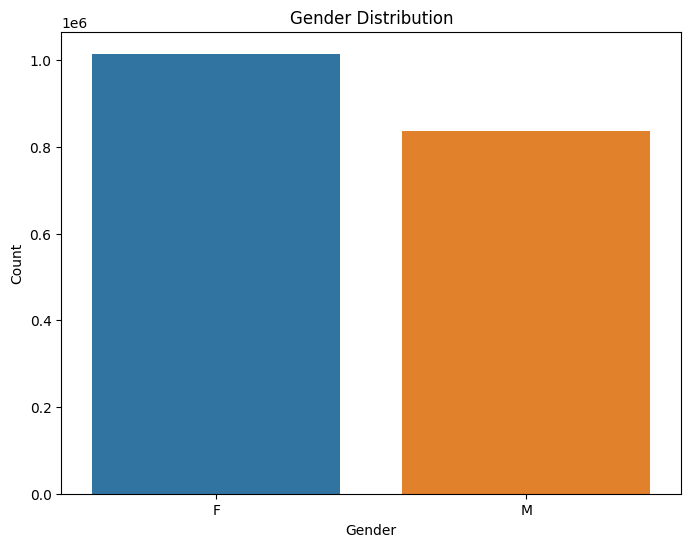

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=final_data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

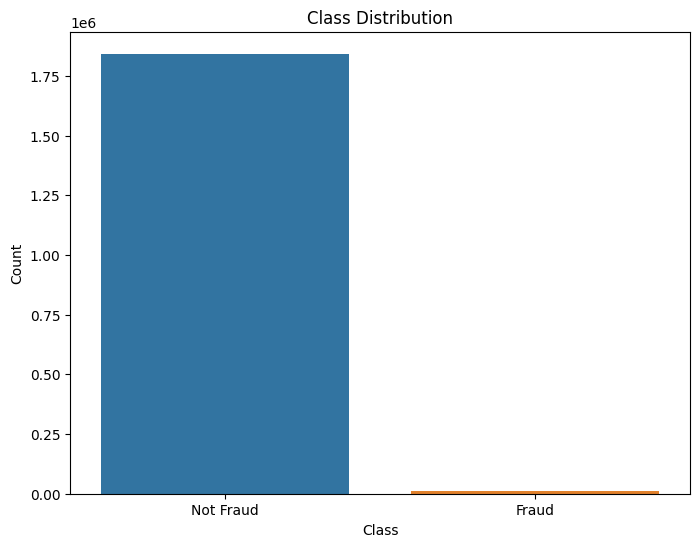

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=final_data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

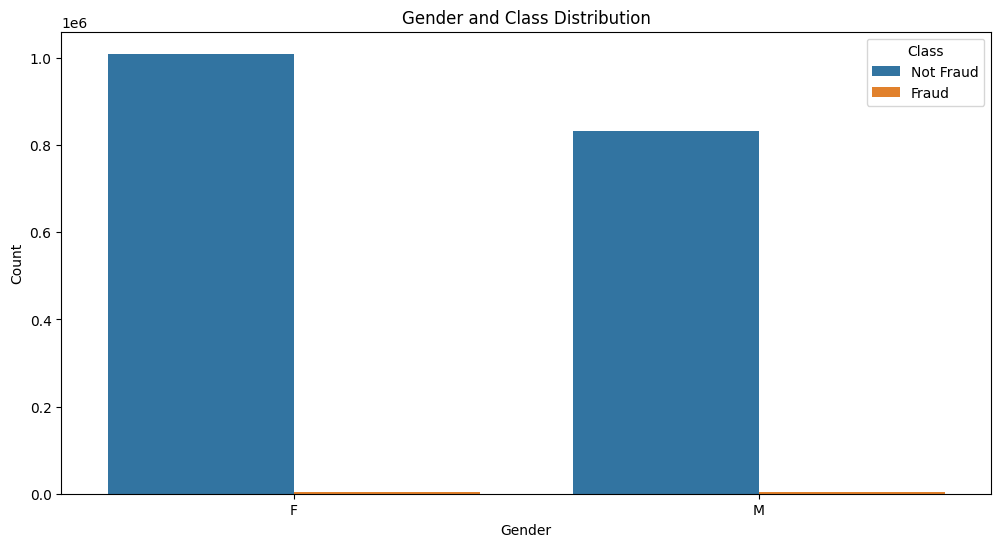

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x='gender', hue='is_fraud', data=final_data)
plt.title('Gender and Class Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Not Fraud', 'Fraud'])
plt.show()

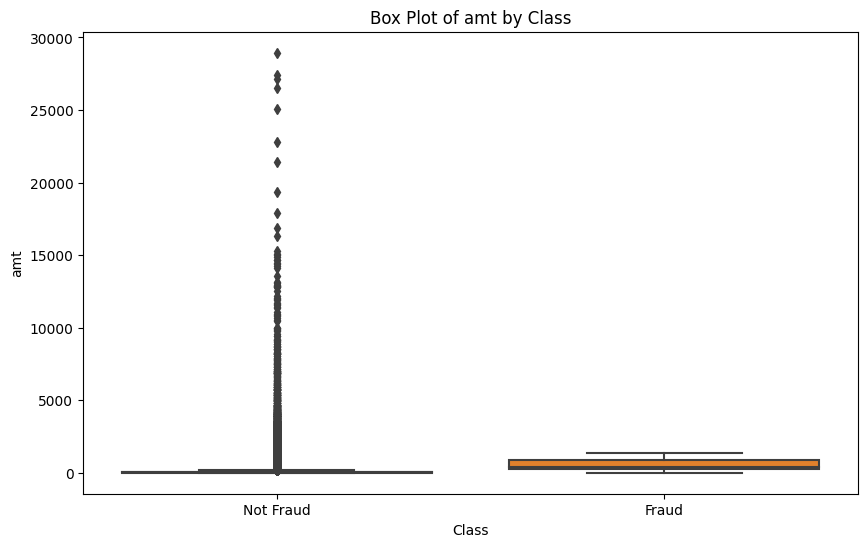

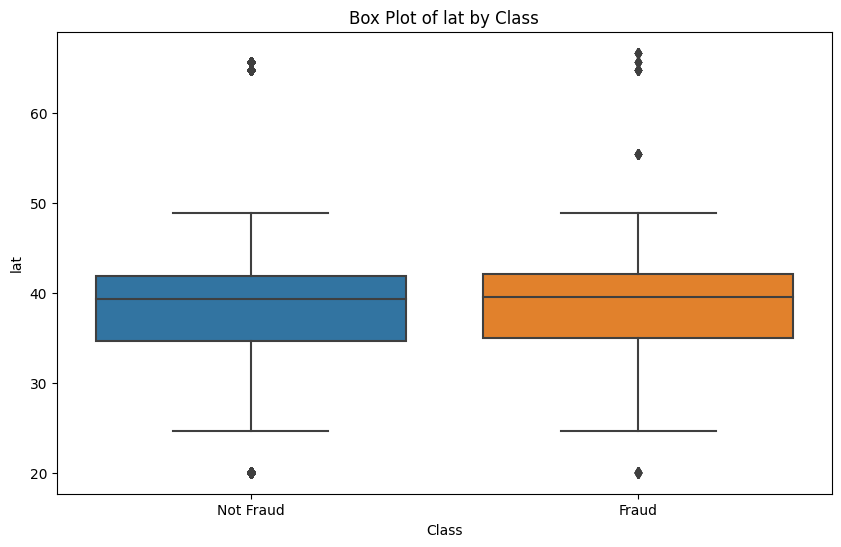

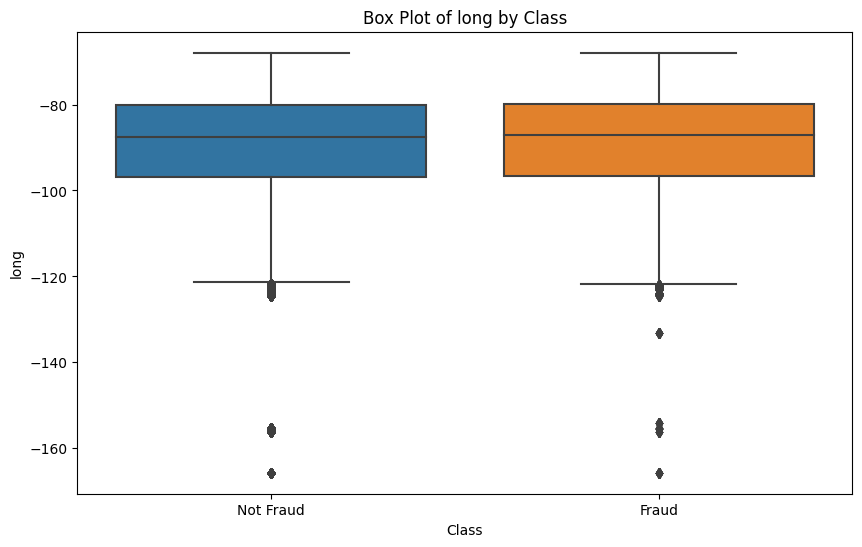

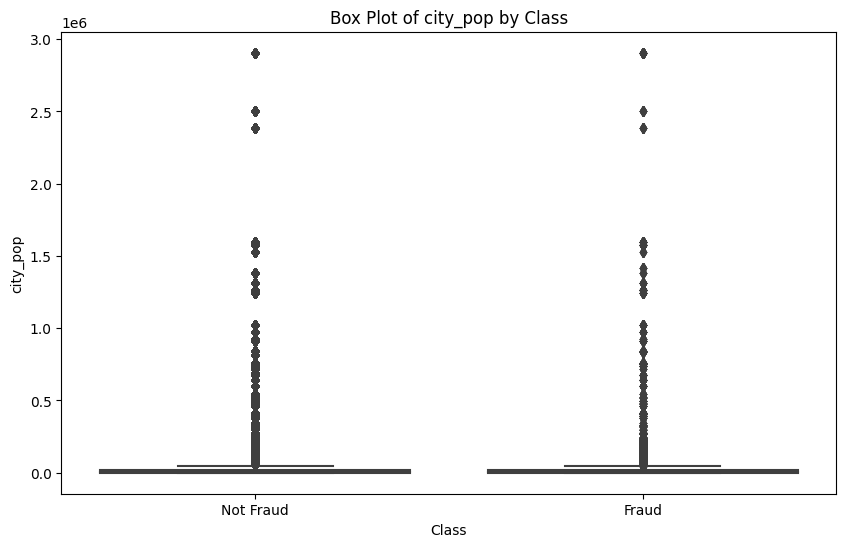

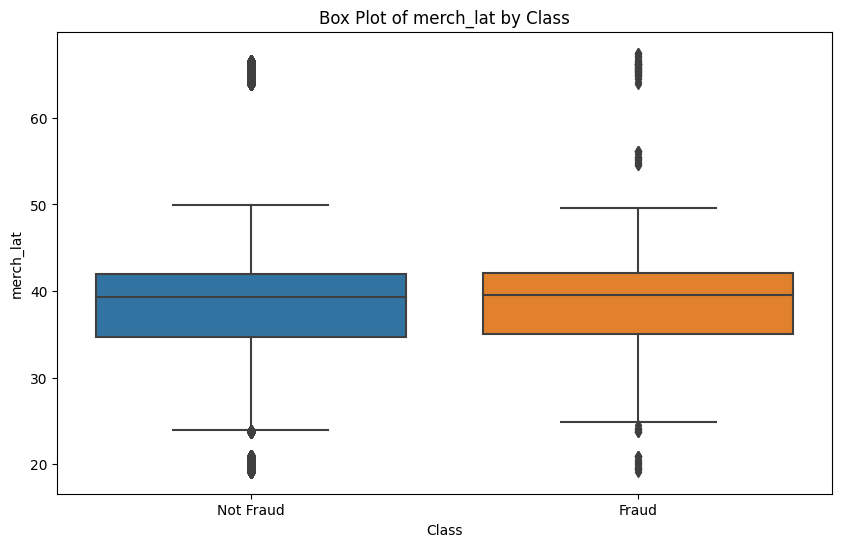

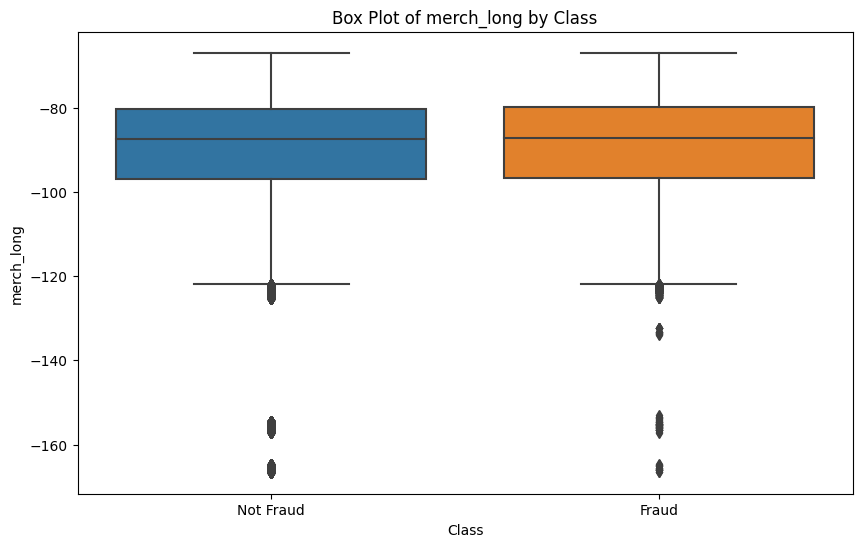

In [21]:
numeric_features = ['amt','lat','long','city_pop','merch_lat','merch_long']
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='is_fraud', y=feature, data=final_data)
    plt.title(f'Box Plot of {feature} by Class')
    plt.xlabel('Class')
    plt.ylabel(feature)
    plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
    plt.show()

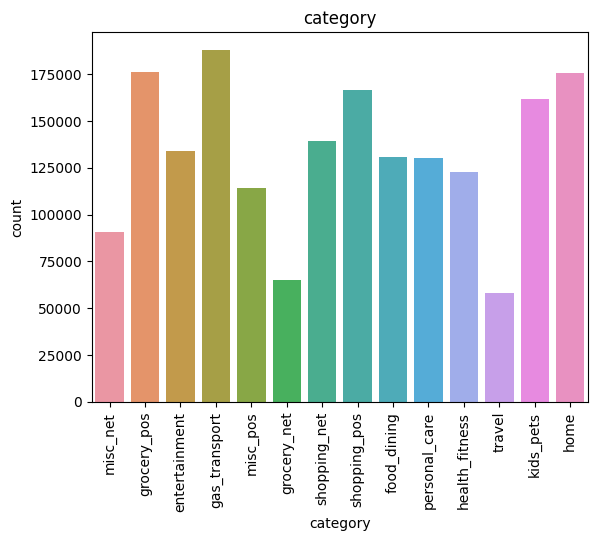

In [22]:
sns.countplot(x='category', data=final_data)
plt.title('category')
plt.xticks(rotation=90)
plt.show()

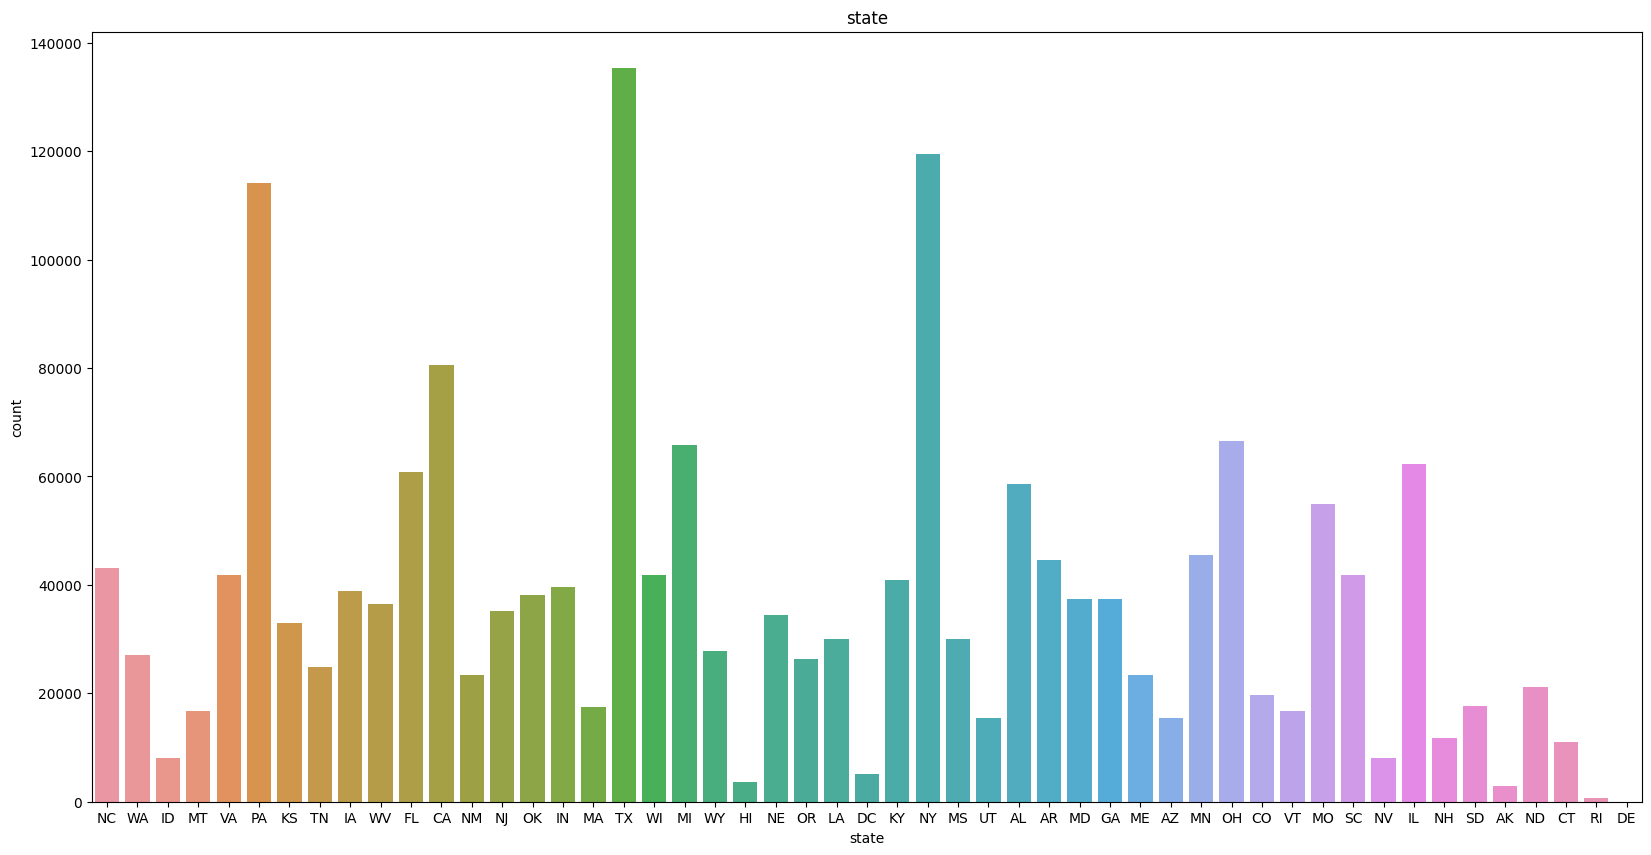

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(x='state', data=final_data)
plt.title('state')
plt.show()

C:\Users\91990\AppData\Local\Temp\ipykernel_2384\773916120.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_data['lat'])


<Axes: xlabel='lat', ylabel='Density'>

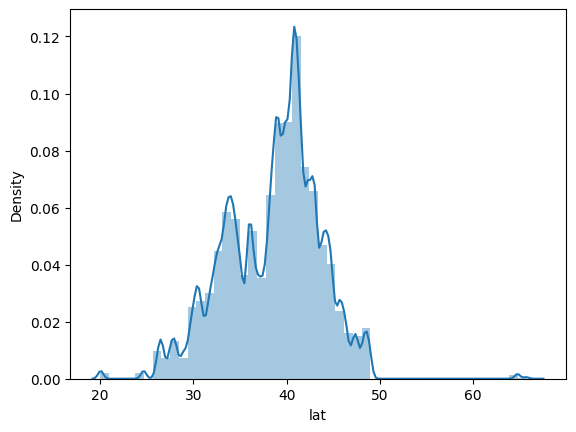

In [24]:
sns.distplot(final_data['lat'])

C:\Users\91990\AppData\Local\Temp\ipykernel_2384\3358592955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_data['long'])


<Axes: xlabel='long', ylabel='Density'>

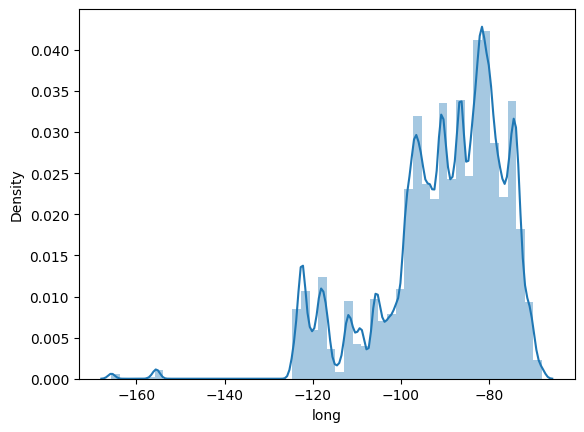

In [25]:
sns.distplot(final_data['long'])

C:\Users\91990\AppData\Local\Temp\ipykernel_2384\1227254078.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_data['merch_lat'])


<Axes: xlabel='merch_lat', ylabel='Density'>

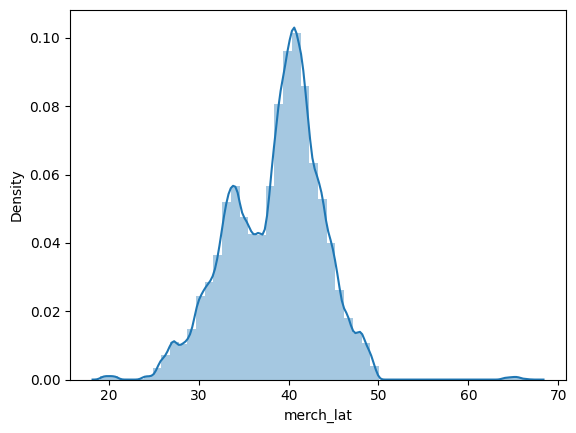

In [26]:
sns.distplot(final_data['merch_lat'])

C:\Users\91990\AppData\Local\Temp\ipykernel_2384\879301848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_data['merch_long'])


<Axes: xlabel='merch_long', ylabel='Density'>

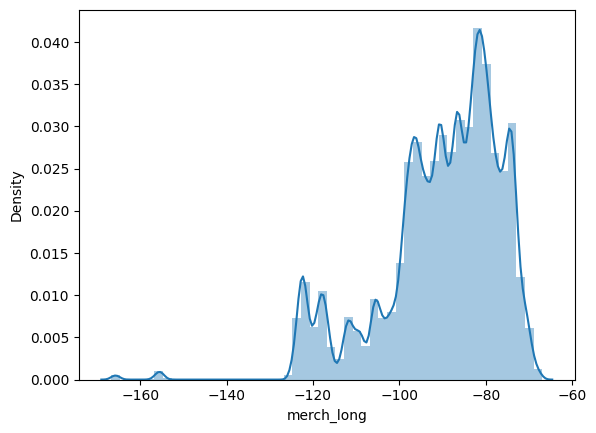

In [27]:
sns.distplot(final_data['merch_long'])

In [28]:
# Convert dob to datetime
birth_date = pd.to_datetime(final_data['dob'])

# Calculate age using the current year and the year of birth
current_year = pd.Timestamp.now().year
final_data['age'] = current_year - birth_date.dt.year

# Adjust for people who haven't had their birthday yet this year
mask = (birth_date.dt.month > pd.Timestamp.now().month) | ((birth_date.dt.month == pd.Timestamp.now().month) & (birth_date.dt.day > pd.Timestamp.now().day))
final_data.loc[mask, 'age'] -= 1

In [29]:
final_data['age']

0         35
1         45
2         61
3         56
4         37
          ..
555714    57
555715    23
555716    41
555717    57
555718    30
Name: age, Length: 1852394, dtype: int32

C:\Users\91990\AppData\Local\Temp\ipykernel_2384\2474165289.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_data['age'])


<Axes: xlabel='age', ylabel='Density'>

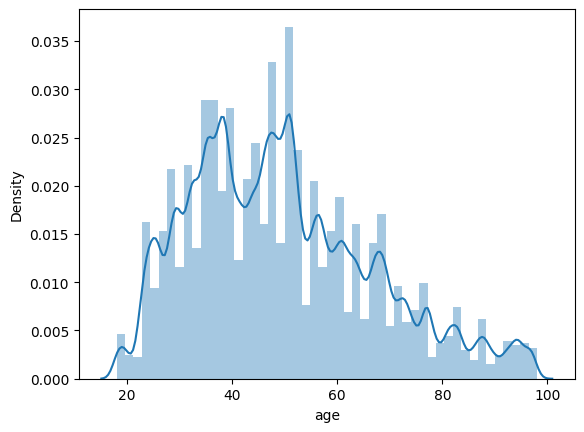

In [30]:
sns.distplot(final_data['age'])

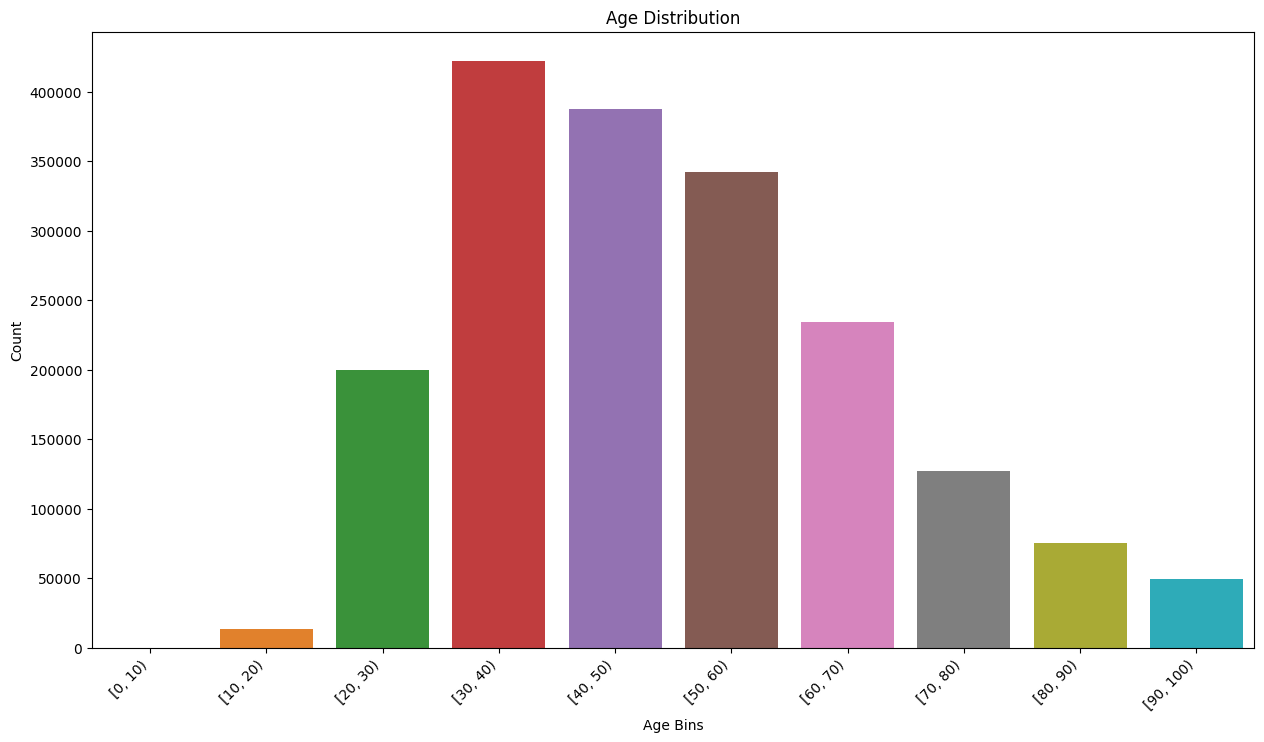

In [31]:
plt.figure(figsize=(15, 8))
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


final_data['age_bins'] = pd.cut(final_data['age'], bins=age_bins, right=False)


sns.countplot(x='age_bins', data=final_data)
plt.title('Age Distribution')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
last_data = pd.concat([tra_data, tes_data], ignore_index=True)
numeric_columns = ['amt','lat','long','merch_lat','merch_long','city_pop']
X = last_data[numeric_columns]
y = last_data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [33]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [34]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
forest_model = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1)
forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1)

In [37]:
from sklearn.metrics import confusion_matrix


y_pred_logistic = logistic_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)
y_pred_forest = forest_model.predict(X_test)


cm_logistic = confusion_matrix(y_test, y_pred_logistic)
cm_tree = confusion_matrix(y_test, y_pred_tree)
cm_forest = confusion_matrix(y_test, y_pred_forest)

<Figure size 600x600 with 0 Axes>

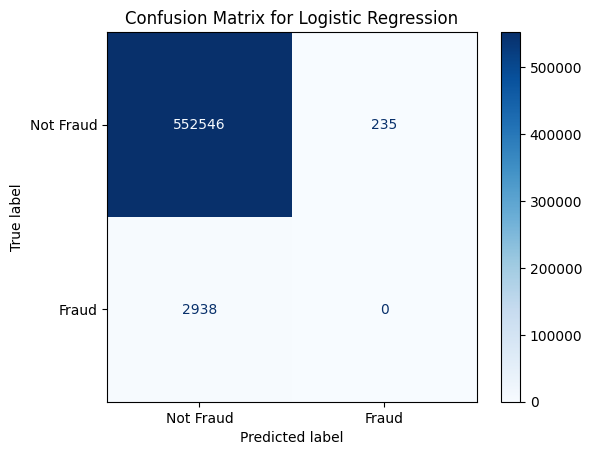

<Figure size 600x600 with 0 Axes>

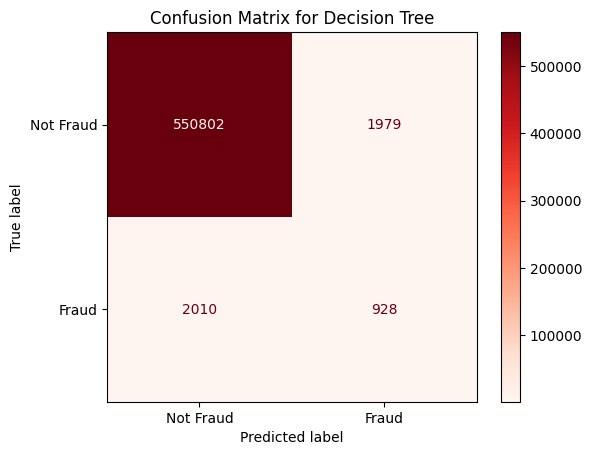

<Figure size 600x600 with 0 Axes>

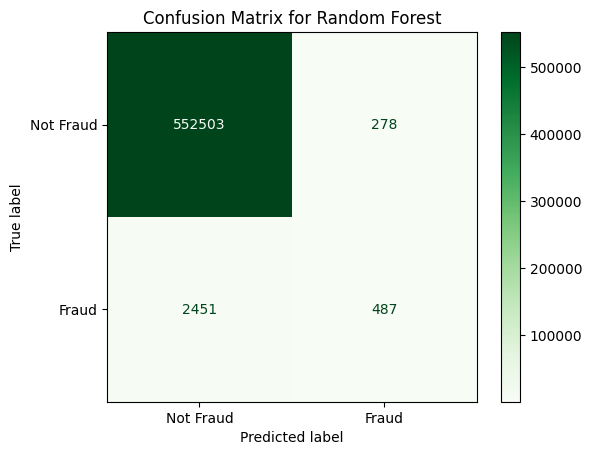

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=['Not Fraud', 'Fraud'])
plt.figure(figsize=(6, 6))
disp_logistic.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=['Not Fraud', 'Fraud'])
plt.figure(figsize=(6, 6))
disp_tree.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix for Decision Tree')
plt.show()

disp_forest = ConfusionMatrixDisplay(confusion_matrix=cm_forest, display_labels=['Not Fraud', 'Fraud'])
plt.figure(figsize=(6, 6))
disp_forest.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [39]:
from sklearn.metrics import classification_report
print("Logistic Regression:\n", classification_report(y_test, y_pred_logistic))
print("Decision Tree:\n", classification_report(y_test, y_pred_tree))
print("Random Forest:\n", classification_report(y_test, y_pred_forest))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    552781
           1       0.00      0.00      0.00      2938

    accuracy                           0.99    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      0.99      0.99    555719

Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552781
           1       0.32      0.32      0.32      2938

    accuracy                           0.99    555719
   macro avg       0.66      0.66      0.66    555719
weighted avg       0.99      0.99      0.99    555719

Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552781
           1       0.64      0.17      0.26      2938

    accuracy                           1.00    555719
   macro avg       0.82      0.58      0.63    555719
weighted avg       0

In [40]:
from sklearn.metrics import accuracy_score
print("The accuracy score for Logistic Regression is",accuracy_score(y_test,y_pred_logistic)*100)

The accuracy score for Logistic Regression is 99.4290279799683


In [41]:
from sklearn.metrics import accuracy_score
print("The accuracy score for Decision Tree is",accuracy_score(y_test,y_pred_tree)*100)

The accuracy score for Decision Tree is 99.28219117935502


In [42]:
from sklearn.metrics import accuracy_score
print("The accuracy score for Decision Tree is",accuracy_score(y_test, y_pred_forest)*100)

The accuracy score for Decision Tree is 99.50892447441963


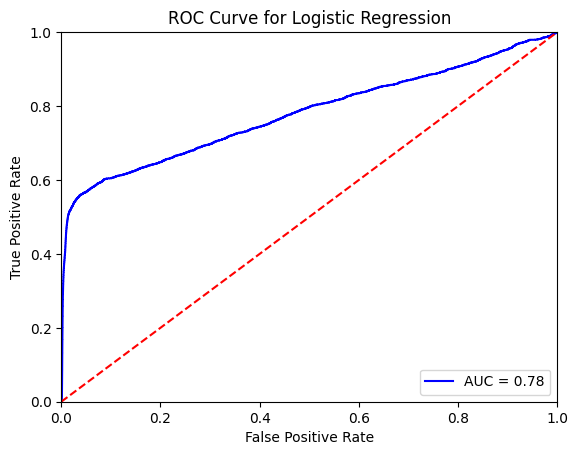

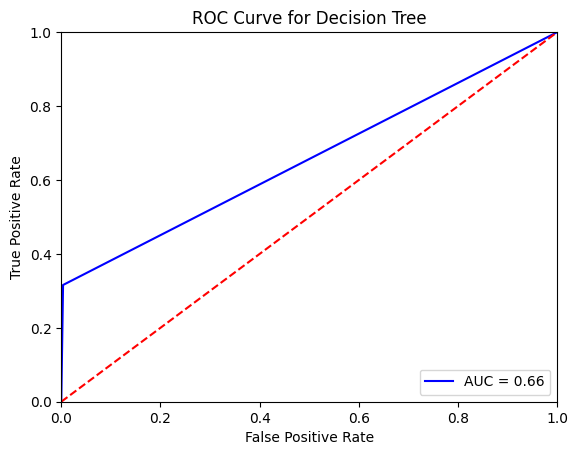

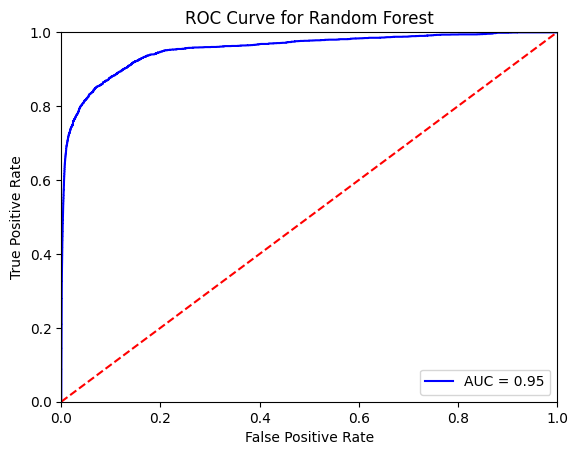

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_test, preds, model_name):
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    plt.title(f'ROC Curve for {model_name}')
    plt.plot(fpr, tpr, 'b', label=f'AUC = {roc_auc:.2f}')
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

plot_roc_curve(y_test, logistic_model.predict_proba(X_test)[:,1], "Logistic Regression")
plot_roc_curve(y_test, tree_model.predict_proba(X_test)[:,1], "Decision Tree")
plot_roc_curve(y_test, forest_model.predict_proba(X_test)[:,1], "Random Forest")


In [44]:
import numpy as np

amt = np.random.uniform(0, 1000)  
lat = np.random.uniform(-90, 90) 
long = np.random.uniform(-180, 180) 
merch_lat = np.random.uniform(-90, 90)
merch_long = np.random.uniform(-180, 180)
city_pop = np.random.randint(0, 1000000) 

sample = np.array([[amt, lat, long, merch_lat, merch_long, city_pop]])

In [45]:

pred_logistic = logistic_model.predict(sample)
print("Prediction using Logistic Regression:", "Fraud" if pred_logistic[0] else "Not Fraud")

pred_tree = tree_model.predict(sample)
print("Prediction using Decision Tree:", "Fraud" if pred_tree[0] else "Not Fraud")

pred_forest = forest_model.predict(sample)
print("Prediction using Random Forest:", "Fraud" if pred_forest[0] else "Not Fraud")

Prediction using Logistic Regression: Fraud
Prediction using Decision Tree: Fraud
Prediction using Random Forest: Not Fraud


C:\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
